In [63]:
import importlib
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
eda_dpp_utils = importlib.import_module('eda_dpp_utils')
feature_eng_utils = importlib.import_module('feature_eng_utils')
model_utils = importlib.import_module('model_utils')

importlib.reload(eda_dpp_utils)
importlib.reload(feature_eng_utils)
importlib.reload(model_utils)

<module 'model_utils' from '/Users/shardulankurnewasker/Desktop/actlcompsci/y2/t3/comp9417/forecasting_air_pollution/model_utils.py'>

In [29]:
df, df_unnormalised, num_cols, df_unclean = eda_dpp_utils.preProcessing()
df = model_utils.featurePrep(df_unnormalised)
print(df)
total_nans = df.isna().sum().sum()
print("Total NaNs in the dataframe:", total_nans)
# Check for inf
print("Columns with inf values:")
print(df.columns[(np.isinf(df).any())])
# Check for extremely large values
print("Columns with very large values (>1e10):")
print(df.columns[(df.abs() > 1e10).any()])

                     CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
timestamp                                                                       
2004-03-10 19:00:00     2.0       1292.0  112.000000       9.4       912025.0   
2004-03-10 20:00:00     2.2       1402.0   88.000000       9.0       881721.0   
2004-03-10 21:00:00     2.2       1376.0   80.000000       9.2       898704.0   
2004-03-10 22:00:00     1.6       1272.0   51.000000       6.5       698896.0   
2004-03-10 23:00:00     1.2       1197.0   38.000000       4.7       562500.0   
...                     ...          ...         ...       ...            ...   
2005-04-04 10:00:00     3.1       1314.0  218.811816      13.5      1212201.0   
2005-04-04 11:00:00     2.4       1163.0  218.811816      11.4      1054729.0   
2005-04-04 12:00:00     2.4       1142.0  218.811816      12.4      1129969.0   
2005-04-04 13:00:00     2.1       1003.0  218.811816       9.5       923521.0   
2005-04-04 14:00:00     2.2 

Best alpha selected by CV: 0.00379

Selected features with non-zero coefficients:
               feature  coefficient
1        PT08.S2(NMHC)     0.748414
8          CO(GT)_lag1     0.737296
10       C6H6(GT)_lag1    -0.603451
11        NOx(GT)_lag1     0.213524
3         PT08.S4(NO2)     0.150288
0          PT08.S1(CO)     0.142414
7                   AH    -0.063700
4          PT08.S5(O3)    -0.062100
12        NO2(GT)_lag1     0.047598
5                    T    -0.032224
9        NMHC(GT)_lag1     0.016837
14       hour_bin_6-11    -0.014139
16      hour_bin_18-23     0.009993
17   month_bin_Apr-Jun    -0.007802
18  month_bin_July-Sep     0.004632
2         PT08.S3(NOx)     0.002187
CO(GT) RMSE: 0.5302


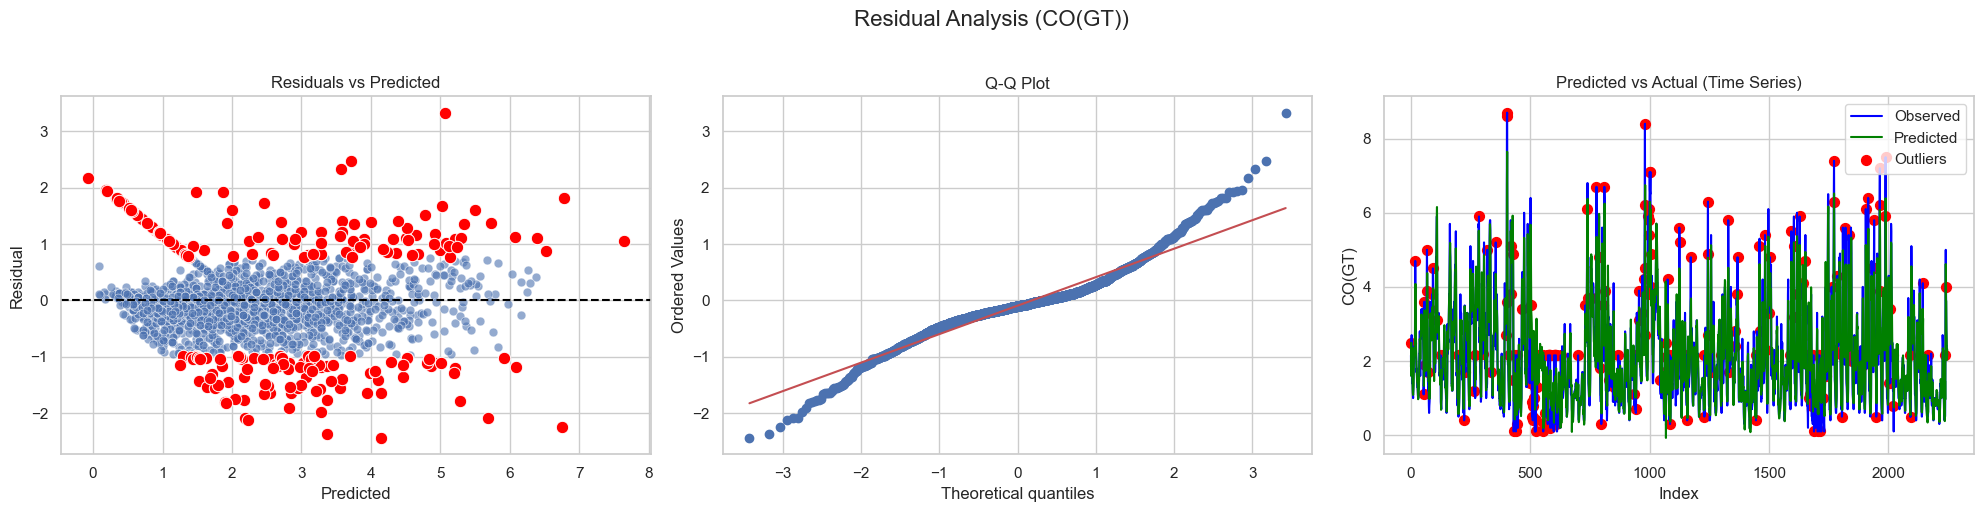

Best alpha selected by CV: 0.00695

Selected features with non-zero coefficients:
           feature  coefficient
1    PT08.S2(NMHC)     7.479779
11    NOx(GT)_lag1     0.032770
5                T    -0.016181
15  hour_bin_12-17    -0.014869
12    NO2(GT)_lag1    -0.014669
16  hour_bin_18-23    -0.013981
7               AH    -0.007473
14   hour_bin_6-11    -0.006136
4      PT08.S5(O3)    -0.002216
C6H6(GT) RMSE: 0.2906


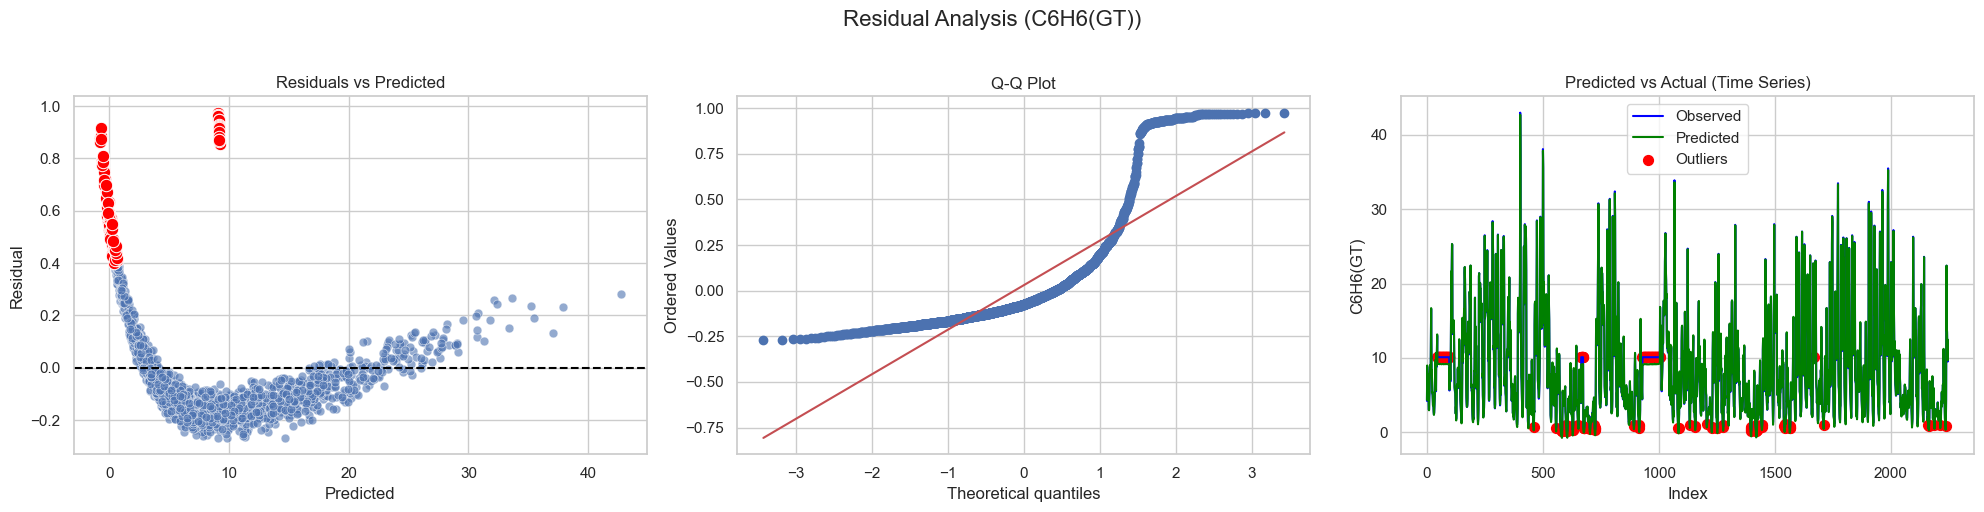

Best alpha selected by CV: 0.00010

Selected features with non-zero coefficients:
               feature  coefficient
11        NOx(GT)_lag1   147.090164
1        PT08.S2(NMHC)    78.446862
10       C6H6(GT)_lag1   -56.042548
12        NO2(GT)_lag1   -22.851259
3         PT08.S4(NO2)   -22.157119
18  month_bin_July-Sep    16.669160
0          PT08.S1(CO)    15.722789
19   month_bin_Oct-Dec    15.392604
8          CO(GT)_lag1    12.259915
17   month_bin_Apr-Jun     9.915056
7                   AH    -7.462732
4          PT08.S5(O3)     6.381893
6                   RH     6.206293
2         PT08.S3(NOx)     5.366439
14       hour_bin_6-11     3.443527
9        NMHC(GT)_lag1    -2.599263
15      hour_bin_12-17     2.179578
16      hour_bin_18-23    -1.399662
13           is_sunday    -1.369083
5                    T     0.970222
NOx(GT) RMSE: 90.9236


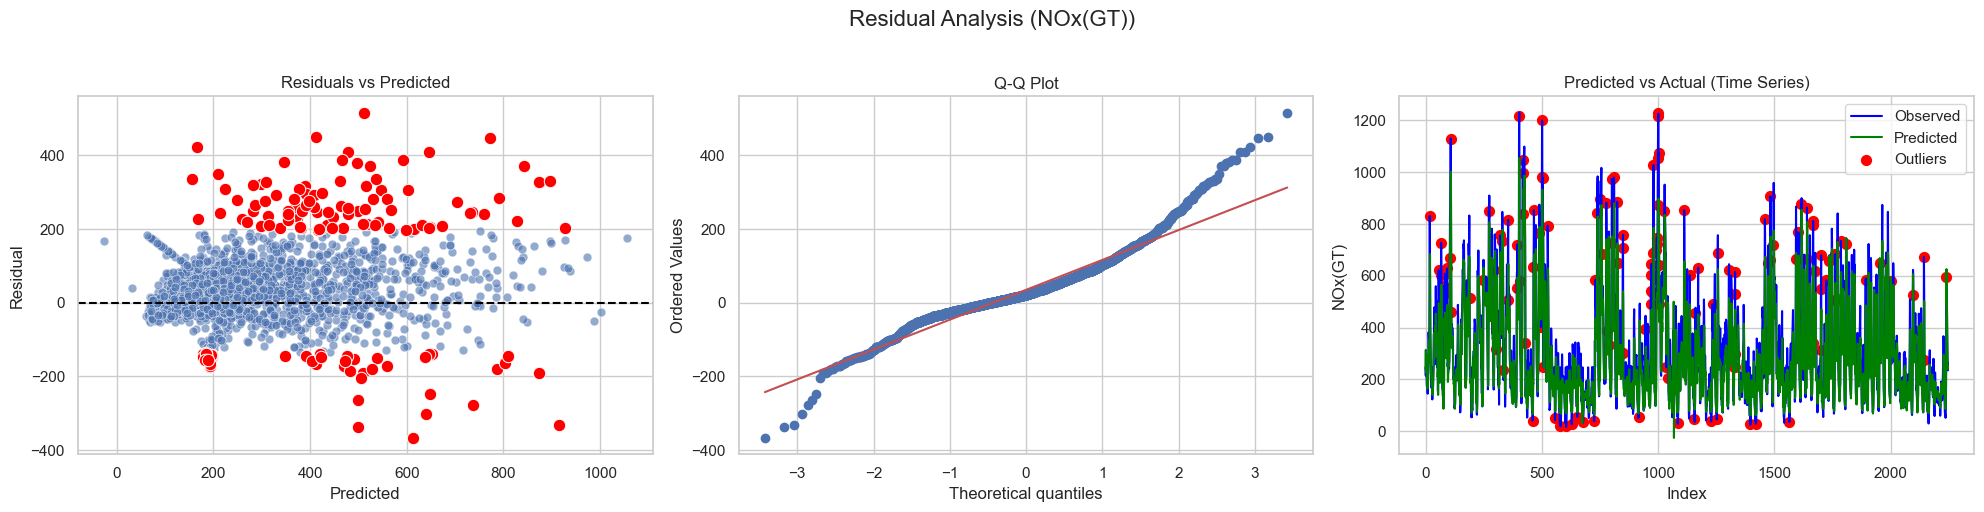

Best alpha selected by CV: 0.48329

Selected features with non-zero coefficients:
               feature  coefficient
12        NO2(GT)_lag1    22.969529
1        PT08.S2(NMHC)     8.726089
4          PT08.S5(O3)     5.692999
10       C6H6(GT)_lag1    -5.531592
7                   AH    -2.920040
8          CO(GT)_lag1     1.912318
14       hour_bin_6-11     1.274677
6                   RH    -1.259193
15      hour_bin_12-17     1.185480
19   month_bin_Oct-Dec     0.494559
18  month_bin_July-Sep     0.492015
0          PT08.S1(CO)     0.484525
17   month_bin_Apr-Jun    -0.457175
NO2(GT) RMSE: 25.9057


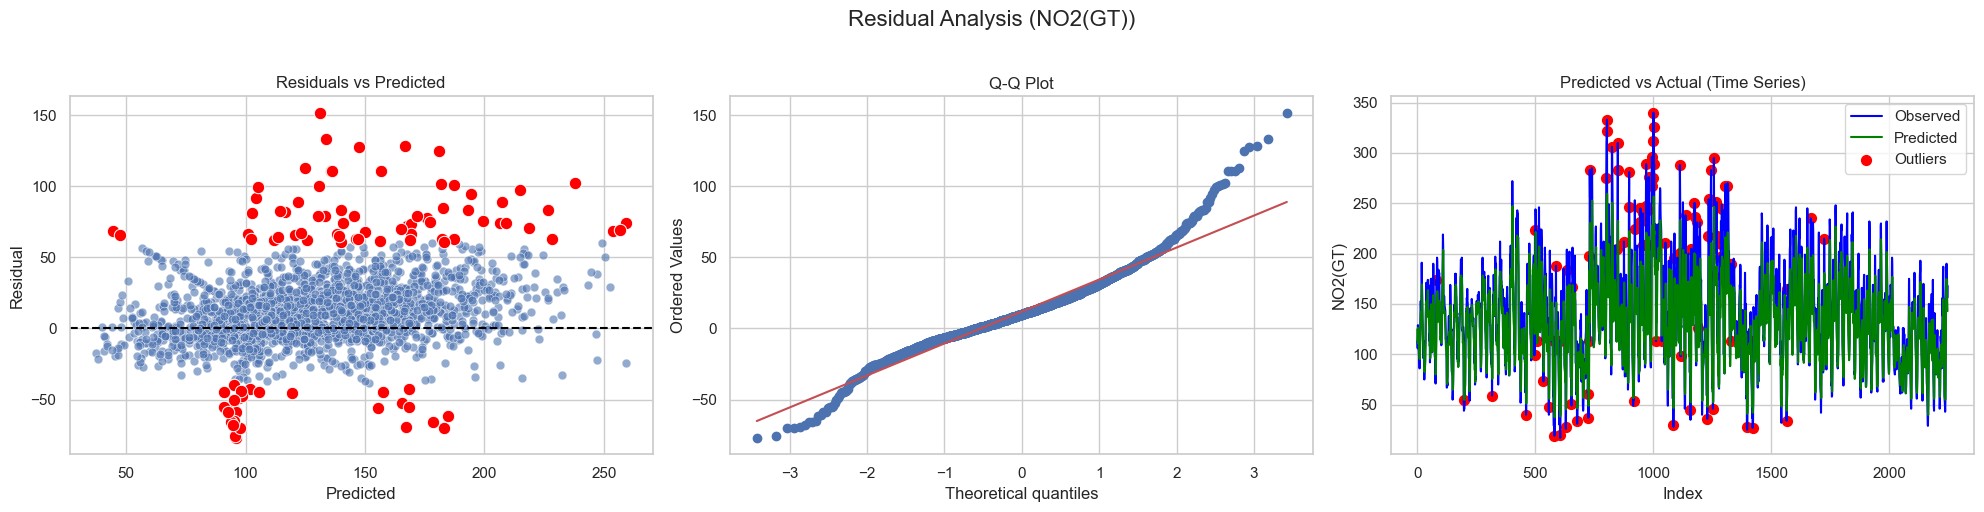

In [48]:
# Regression MODEL
targets = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'] # 'NMHC(GT)' missing
feature_names, X_train, y_train, X_test, y_test = model_utils.splitSets(df)  # X_train, X_test already scaled
alphas = np.logspace(-4, 1, 20)

X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df  = pd.DataFrame(X_test, columns=feature_names)

for t in targets:
    lasso_model, selected_features, coefficients, optimal_alpha = \
        model_utils.lassoRegression(X_train_df, y_train[t], alphas)
    
    if len(selected_features) > 0:
        model_utils.plotResiduals(
            lasso_model, X_test_df, y_test[t],
            selected_features=X_train_df.columns,  # use all training columns for prediction
            target_name=t
        )




=== Logistic Lasso for CO_class ===
Best C (inverse of regularization strength): 2.782559402207126

Coefficients (features x classes):
                           0         1         2
PT08.S1(CO)         0.390773 -0.660401  0.000000
NMHC(GT)            1.700307 -0.661858  0.000000
C6H6(GT)            0.000000 -7.836060  4.619571
PT08.S2(NMHC)       0.000000  4.217100 -6.015889
NOx(GT)             3.508388 -1.661512  0.000000
PT08.S3(NOx)       -0.224617  0.000000  0.523244
NO2(GT)             1.209405  0.000000 -0.243809
PT08.S4(NO2)        0.168826 -2.744979  0.000000
PT08.S5(O3)         0.000000  0.342707 -0.603517
T                  -0.048090  0.818568  0.000000
RH                 -0.121939  0.748490  0.000000
AH                  0.000000  0.067226 -0.210770
CO(GT)_lag1         4.486260 -2.881068  0.000000
NMHC(GT)_lag1      -0.641184  0.427697  0.000000
C6H6(GT)_lag1      -1.298495  2.762285  0.000000
NOx(GT)_lag1       -0.858524  0.000000  1.413277
NO2(GT)_lag1       -0.387363  0

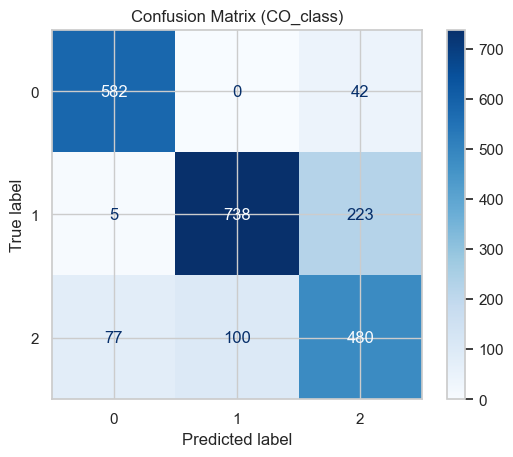

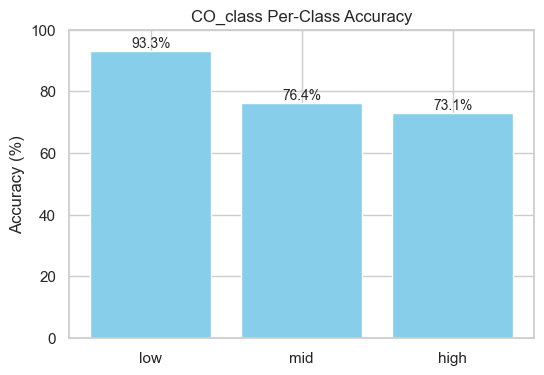

In [64]:
# classification model
df, df_unnormalised, num_cols, df_unclean = eda_dpp_utils.preProcessing()
df = model_utils.featurePrep(df_unnormalised)
X_train, X_test, y_train, y_test, feature_names, le = model_utils.classificationSplitSets(df)

best_model, coef_df, y_pred = model_utils.logisticLasso(
    X_train, y_train, X_test, y_test, target_name="CO_class")
